# Import packages

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import missingno

# fix pour plotly express et Visual Studio Code
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# Data

In [2]:
chemin = "E:/bazar/Work/Work_OpenClassroom/Données utilisables/BaseOracle/"
fichier = "2022_LoL_esports_match_data_from_OraclesElixir_20220414.csv"
data = pd.read_csv(chemin + fichier)

In [3]:
data.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0


## Valeurs manquantes

<AxesSubplot:>

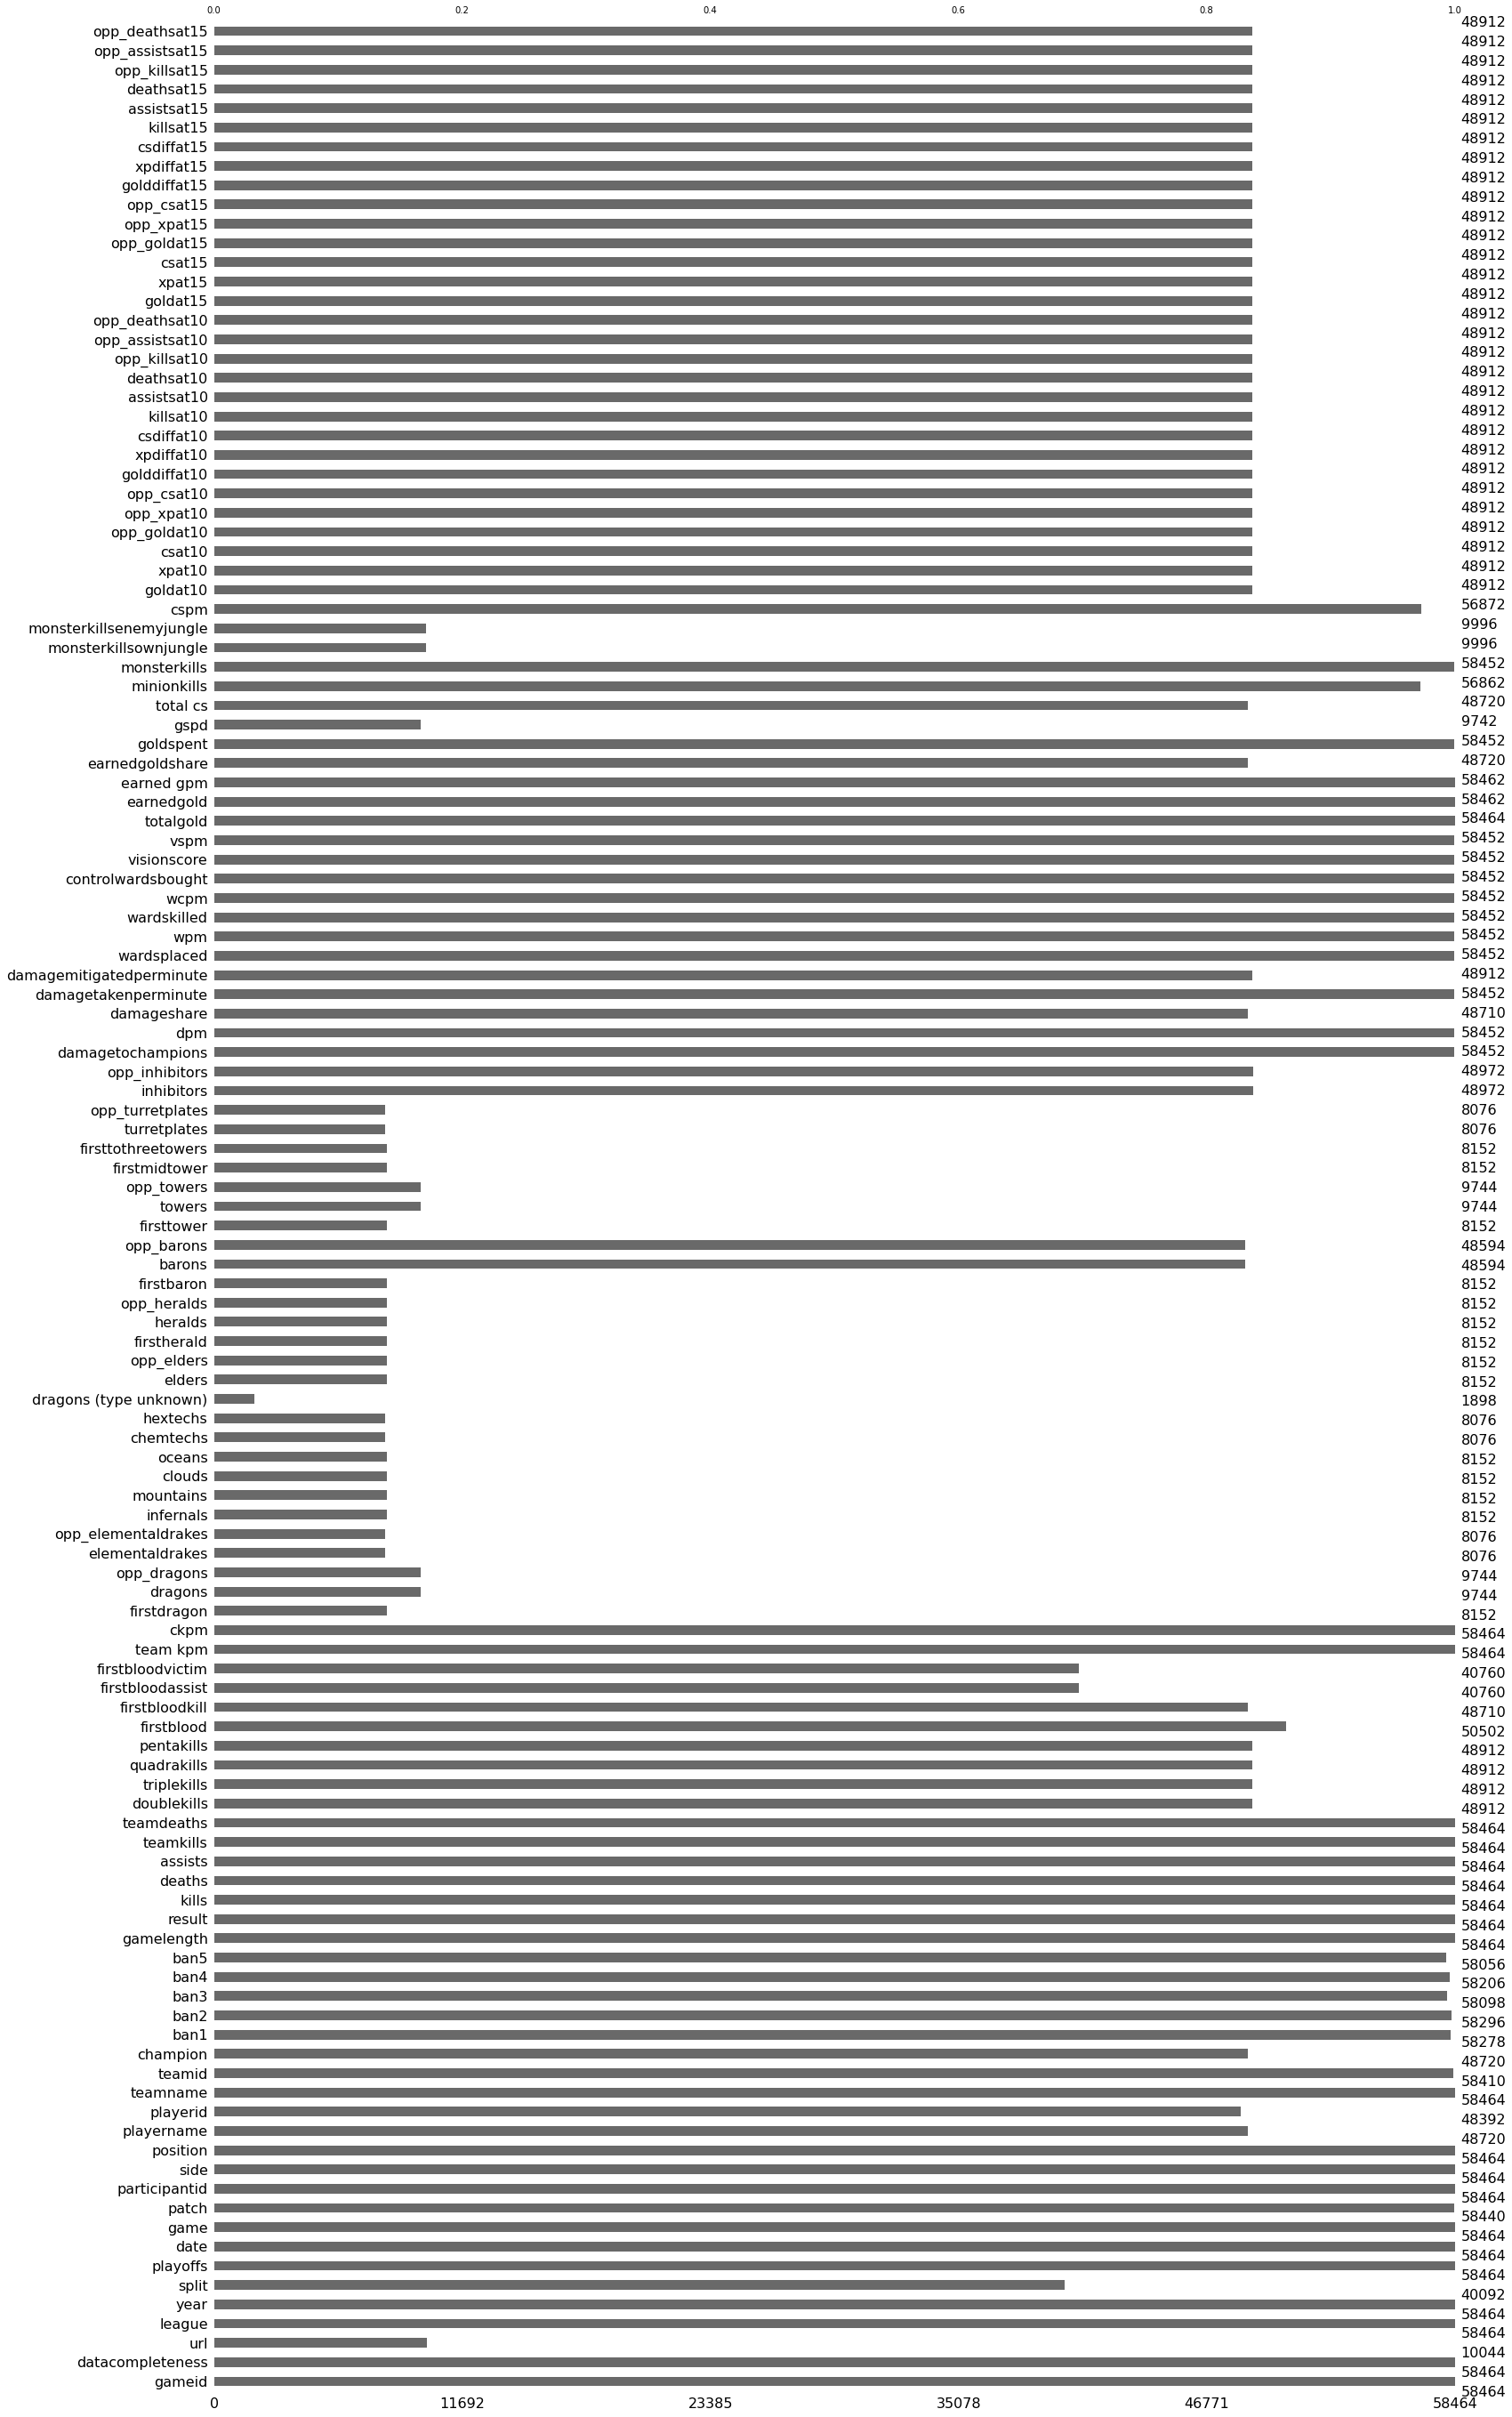

In [4]:
missingno.bar(data)

base incomplète donc.. PRenons exemple avec elders

In [5]:
data['elders'].unique()

array([nan,  0.,  1.,  2.])

### Correction

On va remplacer les NA par des 0 pour les valeurs numériques


In [6]:
# Dans la fonction lambda, le 'else' est obligatoire... Donc si integer/float, on remplace le nan par 0
# Si pas integer/float, on laisse le nan.

data = data.apply(lambda x: x.fillna(0) if x.dtype.kind in 'if' else x.fillna(np.nan)) # kind -> i = integer / f = float
data['elders'].unique()

array([0., 1., 2.])

In [7]:
data

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58459,ESPORTSTMNT03_2637876,complete,NaN,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,...,114.0,2587.0,421.0,31.0,5.0,2.0,1.0,0.0,0.0,3.0
58460,ESPORTSTMNT03_2637876,complete,NaN,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,...,118.0,41.0,-342.0,8.0,2.0,1.0,0.0,1.0,0.0,1.0
58461,ESPORTSTMNT03_2637876,complete,NaN,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,...,0.0,943.0,731.0,18.0,1.0,7.0,0.0,0.0,0.0,3.0
58462,ESPORTSTMNT03_2637876,complete,NaN,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,...,509.0,-4527.0,-240.0,-66.0,2.0,0.0,9.0,9.0,18.0,2.0


<AxesSubplot:>

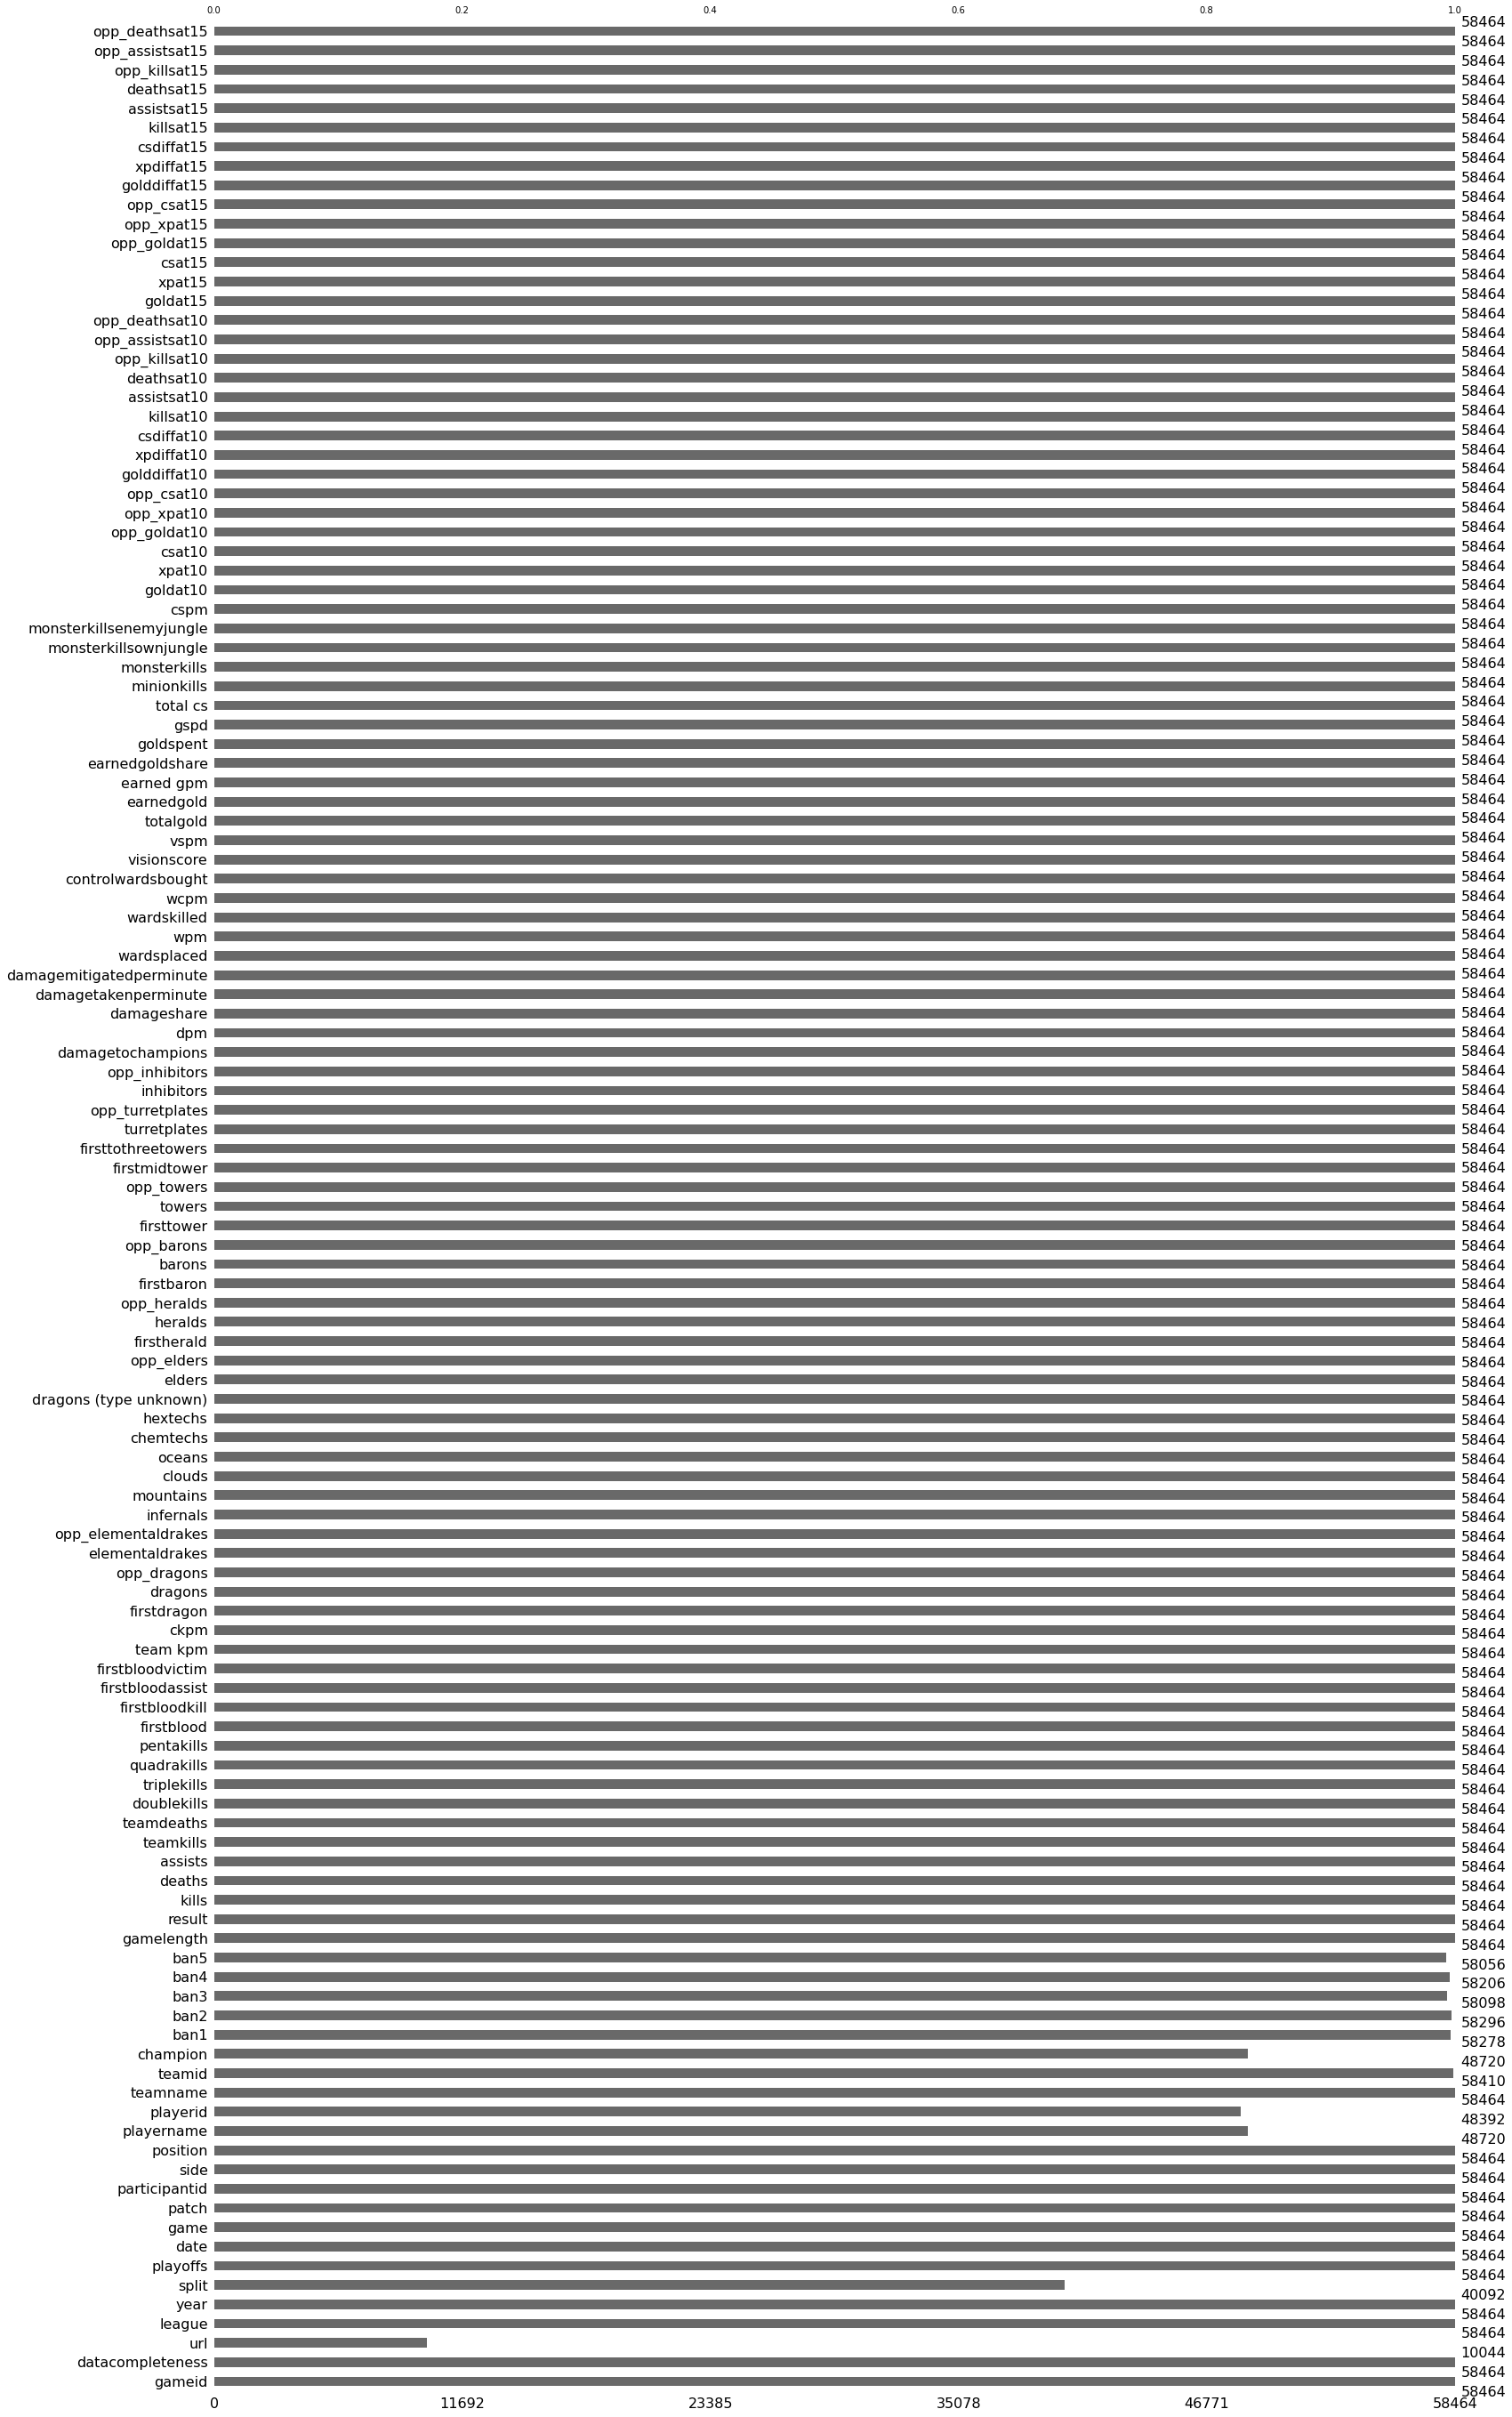

In [8]:
missingno.bar(data)

In [9]:
data.columns.values

array(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch', 'participantid', 'side',
       'position', 'playername', 'playerid', 'teamname', 'teamid',
       'champion', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'gamelength',
       'result', 'kills', 'deaths', 'assists', 'teamkills', 'teamdeaths',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'firstblood', 'firstbloodkill', 'firstbloodassist',
       'firstbloodvictim', 'team kpm', 'ckpm', 'firstdragon', 'dragons',
       'opp_dragons', 'elementaldrakes', 'opp_elementaldrakes',
       'infernals', 'mountains', 'clouds', 'oceans', 'chemtechs',
       'hextechs', 'dragons (type unknown)', 'elders', 'opp_elders',
       'firstherald', 'heralds', 'opp_heralds', 'firstbaron', 'barons',
       'opp_barons', 'firsttower', 'towers', 'opp_towers',
       'firstmidtower', 'firsttothreetowers', 'turretplates',
       'opp_turretplates', 'inhibitors', 'opp_inhibitors

In [10]:
# Gamelength secondes en minutes

data['gamelength'] = data['gamelength']/60

## Colonnes à supprimer

In [11]:
colonne_delete = ['url', 'datacompleteness']
data.drop(colonne_delete, axis=1, inplace=True)
data

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,1,Blue,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,2,Blue,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,3,Blue,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,4,Blue,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,5,Blue,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58459,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,8,Red,...,114.0,2587.0,421.0,31.0,5.0,2.0,1.0,0.0,0.0,3.0
58460,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,9,Red,...,118.0,41.0,-342.0,8.0,2.0,1.0,0.0,1.0,0.0,1.0
58461,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,10,Red,...,0.0,943.0,731.0,18.0,1.0,7.0,0.0,0.0,0.0,3.0
58462,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,100,Blue,...,509.0,-4527.0,-240.0,-66.0,2.0,0.0,9.0,9.0,18.0,2.0


In [12]:
data
# colonne result

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,1,Blue,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,2,Blue,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,3,Blue,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,4,Blue,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,5,Blue,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58459,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,8,Red,...,114.0,2587.0,421.0,31.0,5.0,2.0,1.0,0.0,0.0,3.0
58460,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,9,Red,...,118.0,41.0,-342.0,8.0,2.0,1.0,0.0,1.0,0.0,1.0
58461,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,10,Red,...,0.0,943.0,731.0,18.0,1.0,7.0,0.0,0.0,0.0,3.0
58462,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,100,Blue,...,509.0,-4527.0,-240.0,-66.0,2.0,0.0,9.0,9.0,18.0,2.0


## Nombre de games

In [13]:
data['gameid'].nunique() 

4872

# Affiner les données

## Quelle league ?

In [14]:
# on peut prendre toutes les leagues

data

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,1,Blue,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,2,Blue,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,3,Blue,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,4,Blue,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,5,Blue,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58459,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,8,Red,...,114.0,2587.0,421.0,31.0,5.0,2.0,1.0,0.0,0.0,3.0
58460,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,9,Red,...,118.0,41.0,-342.0,8.0,2.0,1.0,0.0,1.0,0.0,1.0
58461,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,10,Red,...,0.0,943.0,731.0,18.0,1.0,7.0,0.0,0.0,0.0,3.0
58462,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,100,Blue,...,509.0,-4527.0,-240.0,-66.0,2.0,0.0,9.0,9.0,18.0,2.0


## Quel split ?

In [15]:
data['split'].unique()

array(['Spring', nan, 'Winter', 'Split 1', 'Opening', 'Summer'],
      dtype=object)

On va prendre le spring. La méta change régulièrement, donc des facteurs peuvent changer en cours d'année.

In [16]:
split = "Spring"
data = data[data['split'] == split]
data

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,1,Blue,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,2,Blue,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,3,Blue,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,4,Blue,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,5,Blue,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58459,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,8,Red,...,114.0,2587.0,421.0,31.0,5.0,2.0,1.0,0.0,0.0,3.0
58460,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,9,Red,...,118.0,41.0,-342.0,8.0,2.0,1.0,0.0,1.0,0.0,1.0
58461,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,10,Red,...,0.0,943.0,731.0,18.0,1.0,7.0,0.0,0.0,0.0,3.0
58462,ESPORTSTMNT03_2637876,LCSA,2022,Spring,1,2022-04-14 00:49:00,4,12.05,100,Blue,...,509.0,-4527.0,-240.0,-66.0,2.0,0.0,9.0,9.0,18.0,2.0


## Play-off ?
On ne veut pas les PO

In [17]:
playoff = 0
data = data[data['playoffs'] == playoff]

if playoff == 0:
    data.drop(['game'], axis=1, inplace=True) # Il y a forcément qu'une seule game si pas de po .. A changer si LCK/LPL

data

,gameid,league,year,split,playoffs,date,patch,participantid,side,position,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,12.01,1,Blue,top,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,12.01,2,Blue,jng,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,12.01,3,Blue,mid,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,12.01,4,Blue,bot,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,12.01,5,Blue,sup,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58363,ESPORTSTMNT03_2637781,VCS,2022,Spring,0,2022-04-13 14:10:16,12.05,8,Red,mid,...,138.0,-1339.0,-1612.0,-33.0,2.0,0.0,4.0,2.0,5.0,1.0
58364,ESPORTSTMNT03_2637781,VCS,2022,Spring,0,2022-04-13 14:10:16,12.05,9,Red,bot,...,111.0,2595.0,152.0,15.0,3.0,1.0,0.0,0.0,1.0,1.0
58365,ESPORTSTMNT03_2637781,VCS,2022,Spring,0,2022-04-13 14:10:16,12.05,10,Red,sup,...,17.0,-464.0,778.0,16.0,0.0,4.0,0.0,2.0,2.0,2.0
58366,ESPORTSTMNT03_2637781,VCS,2022,Spring,0,2022-04-13 14:10:16,12.05,100,Blue,team,...,479.0,4187.0,4393.0,14.0,12.0,14.0,5.0,5.0,8.0,12.0


In [18]:
data.columns.values

array(['gameid', 'league', 'year', 'split', 'playoffs', 'date', 'patch',
       'participantid', 'side', 'position', 'playername', 'playerid',
       'teamname', 'teamid', 'champion', 'ban1', 'ban2', 'ban3', 'ban4',
       'ban5', 'gamelength', 'result', 'kills', 'deaths', 'assists',
       'teamkills', 'teamdeaths', 'doublekills', 'triplekills',
       'quadrakills', 'pentakills', 'firstblood', 'firstbloodkill',
       'firstbloodassist', 'firstbloodvictim', 'team kpm', 'ckpm',
       'firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes',
       'opp_elementaldrakes', 'infernals', 'mountains', 'clouds',
       'oceans', 'chemtechs', 'hextechs', 'dragons (type unknown)',
       'elders', 'opp_elders', 'firstherald', 'heralds', 'opp_heralds',
       'firstbaron', 'barons', 'opp_barons', 'firsttower', 'towers',
       'opp_towers', 'firstmidtower', 'firsttothreetowers',
       'turretplates', 'opp_turretplates', 'inhibitors', 'opp_inhibitors',
       'damagetochampions', 'dpm', 'dam

# Observations
## Durée des games

In [19]:
grp_game = data.groupby('gameid')['gamelength'].mean()
grp_game

gameid
8401-8401_game_1         22.750000
8401-8401_game_2         24.066667
8402-8402_game_1         31.550000
8402-8402_game_2         37.850000
8402-8402_game_3         31.666667
                           ...    
ESPORTSTMNT06_2290566    27.600000
ESPORTSTMNT06_2290567    37.366667
ESPORTSTMNT06_2290579    28.866667
ESPORTSTMNT06_2290589    39.833333
ESPORTSTMNT06_2290590    29.100000
Name: gamelength, Length: 2344, dtype: float64

In [20]:
fig = px.histogram(grp_game, x="gamelength")
fig.show()

## Victoire
### Victoire par side

In [21]:
grp_side = data.groupby(['gameid', 'side'])['result'].mean()
grp_side = grp_side.reset_index()
grp_side

,gameid,side,result
0,8401-8401_game_1,Blue,1.0
1,8401-8401_game_1,Red,0.0
2,8401-8401_game_2,Blue,1.0
3,8401-8401_game_2,Red,0.0
4,8402-8402_game_1,Blue,1.0
...,...,...,...
4683,ESPORTSTMNT06_2290579,Red,1.0
4684,ESPORTSTMNT06_2290589,Blue,0.0
4685,ESPORTSTMNT06_2290589,Red,1.0
4686,ESPORTSTMNT06_2290590,Blue,0.0


In [22]:
color = {'Blue': 'rgb(122, 148, 231)', 'Red': 'rgb(255, 105, 97)'}
fig = px.histogram(grp_side, x="side", y='result', color="side", color_discrete_map=color, title="Victoire par side")

fig.show()

### Victoires par objectif

In [23]:
# à faire

## Corrélation

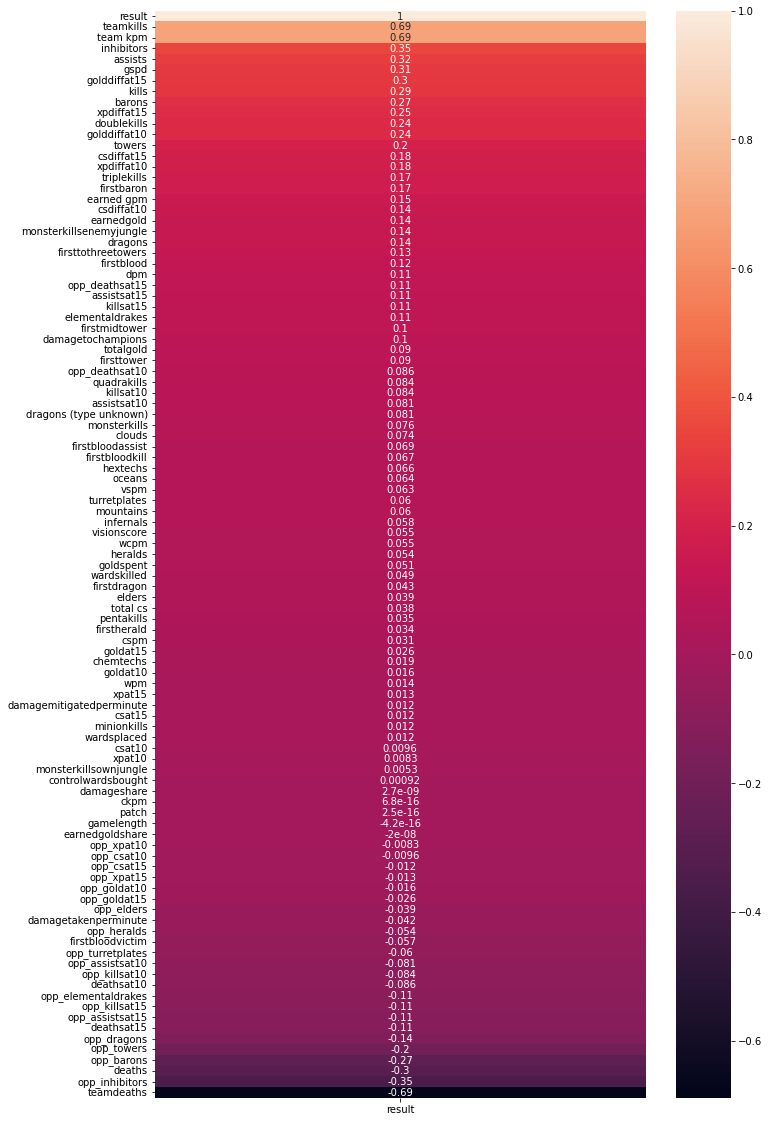

In [52]:
# Corrélation

colonne_exclure = ['year', 'participantid', 'playoffs']

f, ax = plt.subplots(figsize=(11, 20))

heatmap = sns.heatmap(data.drop(colonne_exclure, axis=1).corr()[['result']].sort_values(by='result', ascending=False), annot=True)



# Vision
par curiosité...

In [25]:
data_vision = data.groupby(['playername', 'league']).mean().reset_index()
data_vision

,playername,league,year,playoffs,patch,participantid,gamelength,result,kills,deaths,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,0909,LDL,2022.0,0.0,12.034118,6.235294,30.061765,0.705882,3.588235,1.647059,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,113,EM,2022.0,0.0,12.050000,5.125000,29.420833,1.000000,3.875000,2.375000,...,93.125000,-151.875000,-806.125000,-13.75000,1.125000,1.625000,1.125000,1.37500,1.125000,1.125000
2,113,LFL,2022.0,0.0,12.023333,5.333333,33.604630,0.666667,2.666667,2.833333,...,89.944444,48.111111,-272.444444,-3.00000,0.944444,2.222222,1.111111,1.00000,1.333333,0.777778
3,2T,VCS,2022.0,0.0,12.036563,5.500000,29.489583,0.406250,3.093750,3.812500,...,133.937500,-166.312500,-71.281250,-5.03125,1.218750,1.531250,1.312500,1.34375,1.531250,1.187500
4,2y1,LDL,2022.0,0.0,12.037857,7.035714,30.388095,0.357143,3.571429,2.571429,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,yyy,LDL,2022.0,0.0,12.033889,3.944444,31.806019,0.666667,2.722222,3.138889,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1182,zeze,LDL,2022.0,0.0,12.020000,4.666667,30.950000,0.333333,0.333333,3.333333,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1183,zs,LPL,2022.0,0.0,12.015417,2.666667,30.622917,0.375000,1.958333,2.666667,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1184,zzx,LDL,2022.0,0.0,12.020000,4.777778,32.420370,0.000000,1.333333,2.888889,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [26]:
data_vision = data_vision[['playername','league', 'wpm','vspm']]

In [27]:
data_tri = data_vision.sort_values(by='wpm', ascending=False)
data_tri.head()

,playername,league,wpm,vspm
1038,Yursan,LCS,2.396780,3.019040
84,Blessing,LCK,2.031300,2.265600
585,Miaoniu,LDL,1.998429,2.705500
1084,eqq,LDL,1.952058,2.766682
1039,Yursan,LCSA,1.949450,2.604289


In [28]:
data_tri.dropna(axis=0, subset=['playername'])

,playername,league,wpm,vspm
1038,Yursan,LCS,2.396780,3.019040
84,Blessing,LCK,2.031300,2.265600
585,Miaoniu,LDL,1.998429,2.705500
1084,eqq,LDL,1.952058,2.766682
1039,Yursan,LCSA,1.949450,2.604289
...,...,...,...,...
1129,rice,LDL,0.206300,0.949100
130,Chad,LCSA,0.201111,1.030492
104,BullyMaguire,LCL,0.157033,0.916333
318,Gama,PGN,0.146550,0.783550


In [29]:
data_tri = data_vision.sort_values(by='vspm', ascending=False)
data_tri.head()

,playername,league,wpm,vspm
917,Tolerant,PRM,1.820239,3.272044
224,Doss,LFL,1.916367,3.220039
159,Cospect,PGN,1.370371,3.163579
437,Jun,LCK CL,1.631850,3.114518
201,Delight,LCK,1.817933,3.109219


In [30]:
data_tri.dropna(axis=0, subset=['playername'])

,playername,league,wpm,vspm
917,Tolerant,PRM,1.820239,3.272044
224,Doss,LFL,1.916367,3.220039
159,Cospect,PGN,1.370371,3.163579
437,Jun,LCK CL,1.631850,3.114518
201,Delight,LCK,1.817933,3.109219
...,...,...,...,...
348,Happy,PCS,0.222500,0.639800
217,Dmitar,EM,0.407900,0.611800
206,Dhokla,LCS,0.367000,0.550500
846,Soboro,LCK,0.282850,0.541600


# Prédiction
prédire le résultat (1 ou 0)

In [31]:
data

,gameid,league,year,split,playoffs,date,patch,participantid,side,position,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,12.01,1,Blue,top,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,12.01,2,Blue,jng,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,12.01,3,Blue,mid,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,12.01,4,Blue,bot,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,12.01,5,Blue,sup,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58363,ESPORTSTMNT03_2637781,VCS,2022,Spring,0,2022-04-13 14:10:16,12.05,8,Red,mid,...,138.0,-1339.0,-1612.0,-33.0,2.0,0.0,4.0,2.0,5.0,1.0
58364,ESPORTSTMNT03_2637781,VCS,2022,Spring,0,2022-04-13 14:10:16,12.05,9,Red,bot,...,111.0,2595.0,152.0,15.0,3.0,1.0,0.0,0.0,1.0,1.0
58365,ESPORTSTMNT03_2637781,VCS,2022,Spring,0,2022-04-13 14:10:16,12.05,10,Red,sup,...,17.0,-464.0,778.0,16.0,0.0,4.0,0.0,2.0,2.0,2.0
58366,ESPORTSTMNT03_2637781,VCS,2022,Spring,0,2022-04-13 14:10:16,12.05,100,Blue,team,...,479.0,4187.0,4393.0,14.0,12.0,14.0,5.0,5.0,8.0,12.0


# à construire